# **Informasi data**

Spesies yang ditemukan dalam dataset: ['Chameleon', 'Crocodile_Alligator', 'Frog', 'Gecko', 'Iguana', 'Lizard', 'Salamander', 'Snake', 'Toad', 'Turtle_Tortoise']

Jumlah gambar per spesies:
Chameleon: 219 gambar
Crocodile_Alligator: 692 gambar
Frog: 499 gambar
Gecko: 312 gambar
Iguana: 499 gambar
Lizard: 500 gambar
Salamander: 484 gambar
Snake: 500 gambar
Toad: 497 gambar
Turtle_Tortoise: 1862 gambar


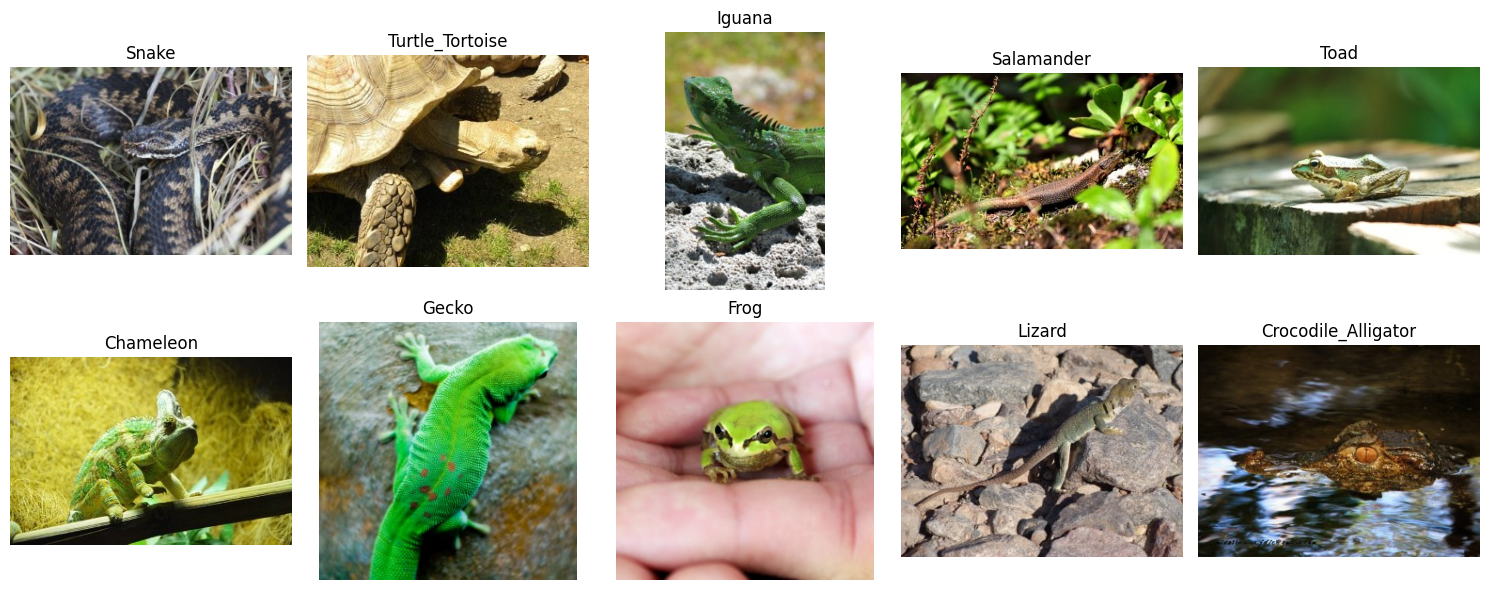

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Path dataset
dataset_path = "/content/drive/MyDrive/TA"

# Mengecek struktur folder dataset
species = sorted(os.listdir(dataset_path))  # Mengurutkan nama folder
print("Spesies yang ditemukan dalam dataset:", species)

# Menghitung jumlah gambar per spesies
data_distribution = {}
for spec in species:
    folder_path = os.path.join(dataset_path, spec)
    if os.path.isdir(folder_path):  # Pastikan ini folder, bukan file lain
        num_images = len(os.listdir(folder_path))
        data_distribution[spec] = num_images

# Menampilkan jumlah gambar per spesies
print("\nJumlah gambar per spesies:")
for spec, count in data_distribution.items():
    print(f"{spec}: {count} gambar")

# Menampilkan beberapa contoh gambar dari dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, spec in enumerate(random.sample(species, 10)):
    folder_path = os.path.join(dataset_path, spec)
    image_file = random.choice(os.listdir(folder_path))  # Pilih gambar secara acak
    img = Image.open(os.path.join(folder_path, image_file))

    axes[i].imshow(img)
    axes[i].set_title(spec)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# **Persiapan dataset**

Pembagian data

In [ ]:
import os
import shutil
import random

# Path asal dataset
dataset_path = "/content/drive/MyDrive/TA"
output_path = "/content/drive/MyDrive/split_dataset"

# Definisi klasifikasi spesies
amphibians = ['Frog', 'Toad', 'Salamander']
reptiles = ['Chameleon', 'Crocodile_Alligator', 'Gecko', 'Iguana', 'Lizard', 'Snake', 'Turtle_Tortoise']

# Rasio split
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Buat folder split dan subfolder reptil/amfibi
for split in ['train', 'val', 'test']:
    for group in ['reptil', 'amfibi']:
        os.makedirs(os.path.join(output_path, split, group), exist_ok=True)

# Bagi dan salin gambar
for spec in sorted(os.listdir(dataset_path)):
    spec_path = os.path.join(dataset_path, spec)
    if not os.path.isdir(spec_path):
        continue

    # Tentukan apakah spesies termasuk reptil atau amfibi
    if spec in amphibians:
        target_group = 'amfibi'
    elif spec in reptiles:
        target_group = 'reptil'
    else:
        continue  # skip jika bukan keduanya

    # Ambil dan acak gambar
    images = os.listdir(spec_path)
    random.shuffle(images)
    total = len(images)
    train_count = int(train_ratio * total)
    val_count = int(val_ratio * total)

    split_sets = {
        'train': images[:train_count],
        'val': images[train_count:train_count + val_count],
        'test': images[train_count + val_count:]
    }

    # Salin gambar ke folder tujuan
    for split, img_list in split_sets.items():
        for img_name in img_list:
            src_path = os.path.join(spec_path, img_name)
            dst_path = os.path.join(output_path, split, target_group, img_name)
            shutil.copy(src_path, dst_path)

# Verifikasi jumlah gambar per kelompok dan split
print("Distribusi akhir dataset:")
for split in ['train', 'val', 'test']:
    print(f"\n{split.upper()} SET:")
    for group in ['reptil', 'amfibi']:
        folder = os.path.join(output_path, split, group)
        count = len(os.listdir(folder))
        print(f"  {group}: {count} gambar")


Distribusi akhir dataset:

TRAIN SET:
  reptil: 3196 gambar
  amfibi: 1028 gambar

VAL SET:
  reptil: 914 gambar
  amfibi: 294 gambar

TEST SET:
  reptil: 463 gambar
  amfibi: 152 gambar


Resize & Normalisasi

In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Path dataset hasil split
split_path = "/content/drive/MyDrive/split_dataset"

# Ukuran gambar yang diinginkan
image_size = (224, 224)

# Fungsi untuk memuat dan memproses gambar (resize dan normalisasi)
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(image_size)
    image_array = np.array(image) / 255.0  # Normalisasi ke 0-1
    return image_array

# Contoh penggunaan: memproses 3 gambar dari masing-masing set
for split in ["train", "val", "test"]:
    print(f"\nContoh preprocessing gambar dari {split} set:")
    split_folder = os.path.join(split_path, split)
    species = sorted(os.listdir(split_folder))
    for spec in species[:1]:  # Ambil 1 spesies sebagai contoh
        folder = os.path.join(split_folder, spec)
        image_files = os.listdir(folder)[:3]  # Ambil 3 gambar pertama
        for image_file in image_files:
            img_path = os.path.join(folder, image_file)
            processed_image = load_and_preprocess_image(img_path)
            print(f"{spec} - {image_file} - shape: {processed_image.shape} - min: {processed_image.min():.2f}, max: {processed_image.max():.2f}")


Contoh preprocessing gambar dari train set:
amfibi - 2352510812_6cfb4db2a1_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 2609518859_6a7e5c088a_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 208405576_9e8cd36c56_b.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00

Contoh preprocessing gambar dari val set:
amfibi - 15903917910_a44466cb60_b.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 5050935678_a44bd0b819_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 765910892_ede2638a38_b.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00

Contoh preprocessing gambar dari test set:
amfibi - 457578601_822dd23dc8_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 3479755049_436545805e_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00
amfibi - 15117254486_355a977eb0_o.jpg - shape: (224, 224, 3) - min: 0.00, max: 1.00


Augmentasi khusus amfibi

In [ ]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm

# Path folder train dengan struktur baru
train_amphibian_dir = '/content/drive/MyDrive/split_dataset/train/amfibi'

# Fungsi augmentasi: flip, rotate, scale (zoom)
def augment_image(img):
    choice = random.choice(['flip', 'rotate', 'scale'])

    h, w = img.shape[:2]

    if choice == 'flip':
        return cv2.flip(img, 1)  # horizontal flip

    elif choice == 'rotate':
        angle = random.choice([-15, 15])
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        return cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)

    elif choice == 'scale':
        scale_factor = random.uniform(0.9, 1.1)
        new_w = int(w * scale_factor)
        new_h = int(h * scale_factor)
        scaled_img = cv2.resize(img, (new_w, new_h))

        if scale_factor < 1.0:
            pad_w = (w - new_w) // 2
            pad_h = (h - new_h) // 2
            padded_img = cv2.copyMakeBorder(
                scaled_img, pad_h, h - new_h - pad_h, pad_w, w - new_w - pad_w,
                cv2.BORDER_REFLECT
            )
            return padded_img
        else:
            start_x = (new_w - w) // 2
            start_y = (new_h - h) // 2
            return scaled_img[start_y:start_y + h, start_x:start_x + w]

# Proses augmentasi
images = os.listdir(train_amphibian_dir)

for img_name in tqdm(images, desc="Augmenting amfibi"):
    img_path = os.path.join(train_amphibian_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Skipping unreadable image: {img_name}")
        continue

    # Augmentasi dan simpan
    augmented_img = augment_image(img)
    base_name, ext = os.path.splitext(img_name)
    new_name = f"{base_name}_aug{ext}"
    cv2.imwrite(os.path.join(train_amphibian_dir, new_name), augmented_img)

Augmenting amfibi: 100%|██████████| 1028/1028 [00:16<00:00, 61.59it/s]


In [ ]:
import os

train_dir = '/content/drive/MyDrive/split_dataset/train'

# Ambil semua nama kelas
classes = sorted(os.listdir(train_dir))

print("Jumlah gambar per kelas (setelah augmentasi):\n")
for cls in classes:
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"{cls:<12}: {num_images} gambar")

Jumlah gambar per kelas (setelah augmentasi):

amfibi      : 2056 gambar
reptil      : 3195 gambar


# **Pemodelan**

Generator data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset
train_dir = '/content/drive/MyDrive/split_dataset/train'
val_dir = '/content/drive/MyDrive/split_dataset/val'
test_dir = '/content/drive/MyDrive/split_dataset/test'

# Parameter umum
image_size = (224, 224)  # sudah sesuai preprocessing
batch_size = 32
class_mode = 'categorical'  # karena multi-kelas

# Generator untuk train
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=True
)

# Generator untuk validation
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=False
)

# Generator untuk test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    shuffle=False
)

Found 5251 images belonging to 2 classes.
Found 1208 images belonging to 2 classes.
Found 614 images belonging to 2 classes.


Arsitektur model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# Fully Connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer (2 kelas)
model.add(Dense(2, activation='softmax'))

# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,242 (42.64 MB)

 Trainable params: 11,177,794 (42.64 MB)

 Non-trainable params: 448 (1.75 KB)

Callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.keras'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,  # Hanya simpan model terbaik berdasarkan monitor
    monitor='val_accuracy',
    mode='max',
    verbose=1
),

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1)

Pelatihan

In [ ]:
# Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[model_checkpoint_callback, early_stop],
    verbose=1
)

Epoch 1/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6166 - loss: 0.9711

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.75662, saving model to /content/drive/MyDrive/model_checkpoint.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - accuracy: 0.6168 - loss: 0.9700 - val_accuracy: 0.7566 - val_loss: 1.4486
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7426 - loss: 0.5713
Epoch 2: val_accuracy did not improve from 0.75662
165/165 ━━━━━━━━━━━━━━━━━━━━ 30s 181ms/step - accuracy: 0.7425 - loss: 0.5712 - val_accuracy: 0.7558 - val_loss: 1.6253
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7658 - loss: 0.4751
Epoch 3: val_accuracy improved from 0.75662 to 0.77070, saving model to /content/drive/MyDrive/model_checkpoint.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 39s 168ms/step - accuracy: 0.7659 - loss: 0.4751 - val_accuracy: 0.7707 - val_loss: 0.5636
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8025 - loss: 0.4290
Epoch 4: val_accuracy did not improve from 0.77070
165/165 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/s

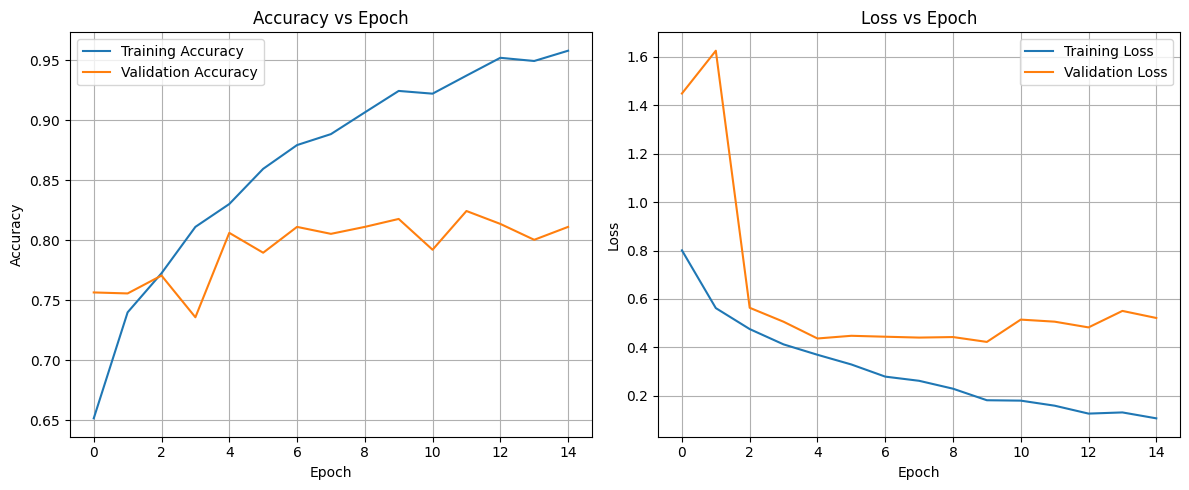

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot loss training dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# **Pengujian**

In [ ]:
from tensorflow.keras.models import load_model

# Path tempat model terbaik disimpan oleh ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.keras'

# Muat model terbaik
best_model = load_model(checkpoint_filepath)

# Sekarang, gunakan best_model untuk evaluasi dan prediksi
print("\nEvaluasi menggunakan model terbaik dari checkpoint:")
test_loss_best, test_acc_best = best_model.evaluate(test_generator)
print(f"Test Accuracy (Best Model): {test_acc_best:.4f} - Test Loss (Best Model): {test_loss_best:.4f}")


Evaluasi menggunakan model terbaik dari checkpoint:
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.7769 - loss: 0.7172
Test Accuracy (Best Model): 0.8453 - Test Loss (Best Model): 0.4520


Evaluasi conffusion matrix

Model terbaik berhasil dimuat dari: /content/drive/MyDrive/model_checkpoint.keras

Membuat prediksi menggunakan model terbaik...
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step

Menghasilkan Confusion Matrix:


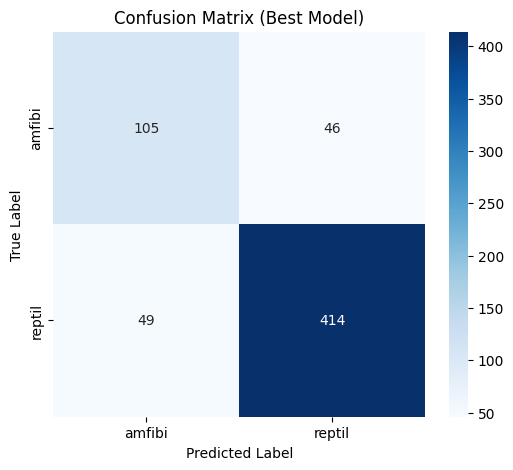


Classification Report (Best Model):
              precision    recall  f1-score   support

      amfibi       0.68      0.70      0.69       151
      reptil       0.90      0.89      0.90       463

    accuracy                           0.85       614
   macro avg       0.79      0.79      0.79       614
weighted avg       0.85      0.85      0.85       614



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model # Import load_model

# Path tempat model terbaik disimpan oleh ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.keras'

# Muat model terbaik dari checkpoint
try:
    best_model = load_model(checkpoint_filepath)
    print(f"Model terbaik berhasil dimuat dari: {checkpoint_filepath}")
except Exception as e:
    print(f"Gagal memuat model terbaik dari {checkpoint_filepath}. Pastikan path benar dan file ada.")
    print(f"Error: {e}")
    # Anda bisa tambahkan exit() atau raise e di sini jika memuat model adalah keharusan

# Pastikan model berhasil dimuat sebelum melanjutkan
if 'best_model' in locals():
    # Mendapatkan prediksi probabilitas menggunakan model terbaik
    print("\nMembuat prediksi menggunakan model terbaik...")
    pred_probs_best = best_model.predict(test_generator, verbose=1)
    pred_classes_best = np.argmax(pred_probs_best, axis=1)

    # Label sebenarnya (ini tetap sama)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Confusion Matrix menggunakan prediksi dari model terbaik
    print("\nMenghasilkan Confusion Matrix:")
    cm_best = confusion_matrix(true_classes, pred_classes_best)

    # Plot confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Best Model)') # Judul diubah untuk kejelasan
    plt.show()

    # Classification Report menggunakan prediksi dari model terbaik
    print("\nClassification Report (Best Model):") # Judul diubah untuk kejelasan
    print(classification_report(true_classes, pred_classes_best, target_names=class_labels))

else:
    print("Tidak dapat melanjutkan evaluasi karena model terbaik gagal dimuat.")

Model terbaik berhasil dimuat dari: /content/drive/MyDrive/model_checkpoint.keras

Membuat prediksi menggunakan model terbaik untuk visualisasi...
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step


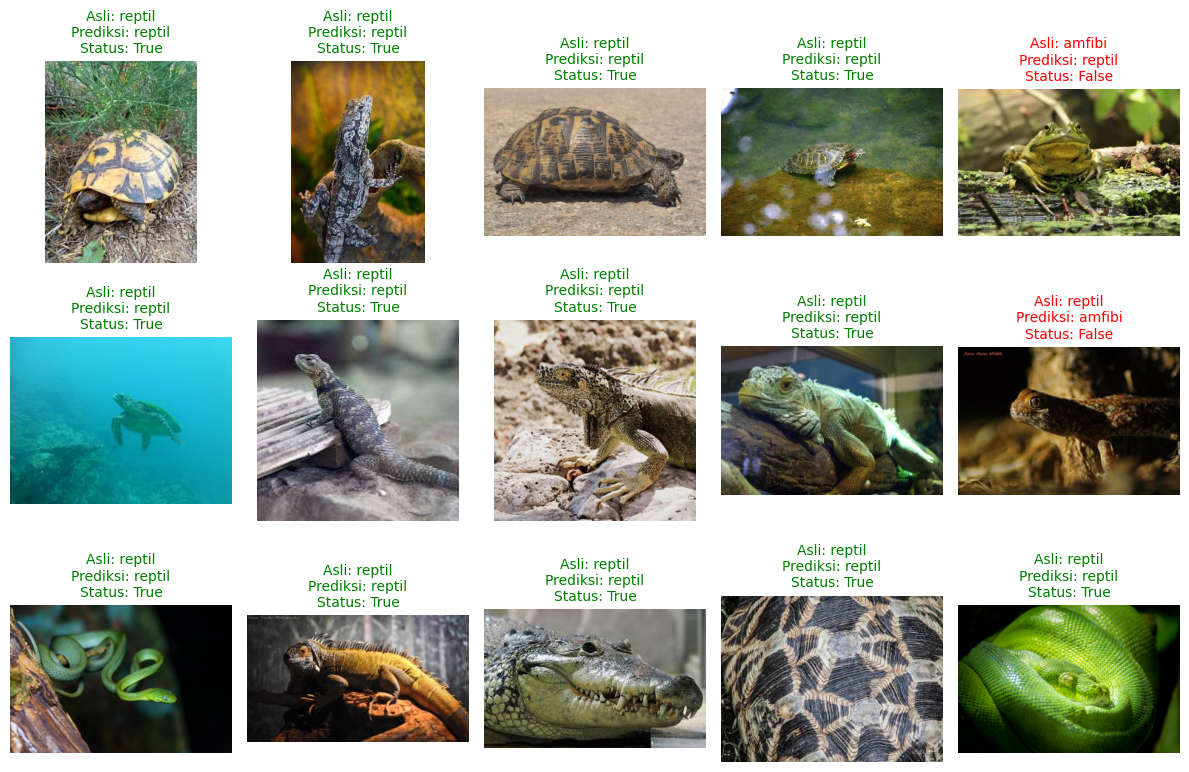

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# Path tempat model terbaik disimpan oleh ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/model_checkpoint.keras'

# Muat model terbaik dari checkpoint (Jika belum dimuat di sel sebelumnya)
try:
    best_model = load_model(checkpoint_filepath)
    print(f"Model terbaik berhasil dimuat dari: {checkpoint_filepath}")
except Exception as e:
    print(f"Gagal memuat model terbaik dari {checkpoint_filepath}. Pastikan path benar dan file ada.")
    print(f"Error: {e}")
    best_model = None # Set to None if loading fails

if best_model:
    # Mendapatkan prediksi probabilitas menggunakan model terbaik
    print("\nMembuat prediksi menggunakan model terbaik untuk visualisasi...")
    pred_probs_best = best_model.predict(test_generator, verbose=1)
    pred_classes_best = np.argmax(pred_probs_best, axis=1)

    # Label sebenarnya (dari generator)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    num_images_to_show = 15
    # Pastikan test_generator sudah diinisialisasi dan memiliki atribut filenames
    if not hasattr(test_generator, 'filenames'):
        print("Error: test_generator tidak memiliki atribut 'filenames'. Pastikan generator sudah diinisialisasi dengan benar.")
    else:
        # Dapatkan indeks acak dari set pengujian
        random_indices = np.random.choice(len(test_generator.filenames), num_images_to_show, replace=False)

        # Mendapatkan path file gambar untuk index yang dipilih
        image_paths_to_show = [test_generator.filepaths[i] for i in random_indices]

        # Mendapatkan label asli untuk index yang dipilih
        true_labels_to_show = [true_classes[i] for i in random_indices]

        # Mendapatkan label prediksi *dari model terbaik* untuk index yang dipilih
        pred_labels_to_show = [pred_classes_best[i] for i in random_indices]

        # Mapping index kelas ke nama kelas
        idx_to_class = {v: k for k, v in test_generator.class_indices.items()}

        # Buat plot visualisasi
        plt.figure(figsize=(12, 8))

        for i in range(num_images_to_show):
            img_path = image_paths_to_show[i]
            true_label_idx = true_labels_to_show[i]
            pred_label_idx = pred_labels_to_show[i] # Menggunakan hasil prediksi dari model terbaik

            # Muat gambar
            img = Image.open(img_path)

            # Dapatkan nama kelas asli dan prediksi
            true_class_name = idx_to_class[true_label_idx]
            pred_class_name = idx_to_class[pred_label_idx] # Menggunakan nama kelas dari prediksi model terbaik

            # Tentukan apakah prediksi benar atau salah
            is_correct = true_label_idx == pred_label_idx

            # Tentukan warna judul
            color = 'green' if is_correct else 'red'
            status_text = "True" if is_correct else "False"

            # Buat subplot untuk setiap gambar
            plt.subplot(3, 5, i + 1)
            plt.imshow(img)
            # Gunakan parameter 'color' pada plt.title()
            plt.title(f"Asli: {true_class_name}\nPrediksi: {pred_class_name}\nStatus: {status_text}", fontsize=10, color=color)
            plt.axis('off')

        plt.tight_layout()
        plt.show()
else:
    print("Tidak dapat menampilkan visualisasi karena model terbaik gagal dimuat.")